<a href="https://colab.research.google.com/github/Wen9324/RFM-Model/blob/main/RFM%E6%A8%A1%E5%9E%8B_%E8%B3%A3%E5%A0%B4%E5%95%86%E5%93%81%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_(_R%E8%AA%9E%E8%A8%80_)_%E6%BA%AB%E9%83%81%E7%B6%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

產生Colab R 程式環境: https://colab.research.google.com/notebook#create=true&language=r

# RFM模型

在行銷資料科學裡，有項工具可協助公司找出 R「新客」（近期有消費的人）、 F「常客」（常常來消費的人）、與M「貴客」（消費金額大的人），這項工具稱為「RFM模型」。

RFM模型是由喬治·卡利南（George Cullinan）於1961年所提出，他發現資料庫分析中，
有三項重要的指標：
- 最近一次消費（Recency）
- 消費頻率（Frequency）
- 消費金額（Monetary）
這三項指標的英文字母的分別為R、F、M，所以就稱為「RFM模型」。

## RFM模型的概念:
1. 最近一次消費（Recency）：
指消費者至今再次購買與上次購買產品的時間差，
例如將「購買日期分為五等分」，每一等分為資料庫的20%：
 - 最近消費的前 20% 編碼為5
 - 20% ~ 40%編碼為4
 - 以此類推到 80% ~ 100% 編碼為1
也就是編碼等級越高的消費者，重複購買比率較高。

2. 消費頻率（Frequency）：
指消費者在一定期間內購買該產品的次數。例如：
 - 次數最多的前 20% 編碼為5
 - 20% ~ 40%編碼為4
 - 以此類推到 80% ~ 100% 編碼為1
編碼等級越高的消費者，其消費頻率越高，忠誠度與顧客價值也越高。

3. 消費金額（Monetary）：
指消費者在一定期間內購買該產品的總金額。
 - 金額最大的前 20% 編碼為5
 - 20% ~ 40% 編碼為4
 - 以此類推到 80% ~ 100% 編碼為1
編碼等級越高的消費者，其消費金額越高，顧客價值也越高。

利用以上的編碼方式，我們可以將顧客，依（R,F,M）的分數，共分成125群，
亦即從最低的（1,1,1）（3分）到最高的（5,5,5）（15分）。

RFM模型能協助企業區分顧客，並預測每種顧客類型的消費者行為。

當企業對顧客進行分群後，再進一步從公司的顧客資料庫中，分析各群顧客背後的消費者行為，
進而發展預測模式。

讓公司的顧客關係管理（CRM）系統在應用上，能夠提升到策略性的層級。

# 1.資料：
此賣場的資料型態。本次資料共4402筆資料，使用檔案連結下載數據。

https://drive.google.com/open?id=1JGkDV3X7CRLHM4H2Zd7UBpDNy3UIToKZ

使用某一匿名賣場的資料，並挑選出其中三件商品，切入R及F的模型分析。
賣場內部資料有：
- 交易代號（orderId）
- 顧客編號（clientId）
- 產品（product）
- 性別（gender）
- 最後交易日期（orderdate）

# 2.安裝必要套件

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




# 3.載入library

In [ ]:
# 載入library
library(dplyr)
library(reshape2)
library(ggplot2)
library(stringr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#4.原始資料
須先上傳 orders.csv

https://drive.google.com/open?id=1JGkDV3X7CRLHM4H2Zd7UBpDNy3UIToKZ

/content/sample_data/orders.csv

In [ ]:
orders <- read_csv("/content/sample_data/orders.csv", col_types = cols(orderdate = col_date(format = "%Y-%m-%d"))) #讀進資料，順便把date的欄位格式改為年月日
head(orders)

New names:
• `` -> `...1`


...1,product,orderId,clientId,gender,orderdate,grossmarg
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>
1,高麗菜,582,230,女性,2017-01-08,10
2,高麗菜,2,276,男性,2017-02-18,10
3,高麗菜,725,277,女性,2017-02-03,10
4,高麗菜,597,279,男性,2017-03-05,10
5,高麗菜,761,92,女性,2017-02-08,10
6,高麗菜,95,190,男性,2017-04-05,10


In [ ]:
str(orders) #看type和欄位名稱

spec_tbl_df [4,384 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1     : num [1:4384] 1 2 3 4 5 6 7 8 9 10 ...
 $ product  : chr [1:4384] "高麗菜" "高麗菜" "高麗菜" "高麗菜" ...
 $ orderId  : num [1:4384] 582 2 725 597 761 95 426 321 239 822 ...
 $ clientId : num [1:4384] 230 276 277 279 92 190 241 115 15 164 ...
 $ gender   : chr [1:4384] "女性" "男性" "女性" "男性" ...
 $ orderdate: Date[1:4384], format: "2017-01-08" "2017-02-18" ...
 $ grossmarg: num [1:4384] 10 10 10 10 10 10 10 10 10 10 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   product = col_character(),
  ..   orderId = col_double(),
  ..   clientId = col_double(),
  ..   gender = col_character(),
  ..   orderdate = col_date(format = "%Y-%m-%d"),
  ..   grossmarg = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


敘述性統計

In [ ]:
summary(orders)

      ...1        product             orderId          clientId    
 Min.   :   1   Length:4384        Min.   :   1.0   Min.   :  1.0  
 1st Qu.:1097   Class :character   1st Qu.: 247.0   1st Qu.: 75.0  
 Median :2192   Mode  :character   Median : 501.0   Median :147.0  
 Mean   :2192                      Mean   : 497.7   Mean   :148.6  
 3rd Qu.:3288                      3rd Qu.: 746.0   3rd Qu.:221.0  
 Max.   :4384                      Max.   :1000.0   Max.   :300.0  
    gender            orderdate            grossmarg    
 Length:4384        Min.   :2017-01-02   Min.   :10.00  
 Class :character   1st Qu.:2017-01-28   1st Qu.:10.00  
 Mode  :character   Median :2017-02-21   Median :10.00  
                    Mean   :2017-02-21   Mean   :20.99  
                    3rd Qu.:2017-03-17   3rd Qu.:50.00  
                    Max.   :2017-04-11   Max.   :50.00  

In [ ]:
today <- as.Date('2017-04-11', format='%Y-%m-%d') #最後一天的消費為2017-04-11，以它當作基準點存成today這個變數

In [ ]:
names(orders)[1] <- "no" #將第一個欄位的名字(原本為空白)存成no
names(orders) #看各個欄位的名字

[1] "no"        "product"   "orderId"   "clientId"  "gender"    "orderdate"
[7] "grossmarg"

# 5.資料處理

In [ ]:
# 資料處理
# ?dcast
# cast {reshape2}	R Documentation
# Cast functions Cast a molten data frame into an array or data frame.
orders01 <- dcast(orders, orderId + clientId + gender + orderdate ~ product, value.var='product', fun.aggregate=length) #(orderId + clientId + gender + orderdate)為要秀出來的欄位，且依據product此變數做分類，fun.aggregate=length是將長度做累加計算
head(orders01) #上行將長資料轉成寬資料

,orderId,clientId,gender,orderdate,牛奶麵包,瓶裝水,高麗菜
,<dbl>,<dbl>,<chr>,<date>,<int>,<int>,<int>
1,1,166,男性,2017-04-07,1,3,2
2,2,276,男性,2017-02-18,2,7,1
3,4,95,女性,2017-03-28,2,4,0
4,5,253,女性,2017-01-27,2,5,0
5,6,34,男性,2017-03-16,1,4,1
6,7,215,男性,2017-04-08,1,1,0


# 6.計算 frequency (頻率), recency (新近度)

In [ ]:
# 計算 frequency (頻率), recency (新近度)
orders02 <- orders01 %>% # %>%為dplyr的功能
  group_by(clientId) %>% #藉由clientId分群
  mutate(frequency=n(),  #mutate產生新的欄位frequency，n()為計算個數
         recency=as.numeric(today-orderdate)) %>% #recency為最後一次消費與最後的時間相差多久
  filter(orderdate==max(orderdate)) %>% #用filter找最大的orderdate出來並存成orderdate(避免同一個顧客有太多orderdate無法挑選)
  filter(orderId==max(orderId)) %>%  #orderId太多了，找一個最大的當代表
  ungroup()

head(orders02)

orderId,clientId,gender,orderdate,牛奶麵包,瓶裝水,高麗菜,frequency,recency
<dbl>,<dbl>,<chr>,<date>,<int>,<int>,<int>,<int>,<dbl>
1,166,男性,2017-04-07,1,3,2,2,4
4,95,女性,2017-03-28,2,4,0,4,14
6,34,男性,2017-03-16,1,4,1,3,26
8,230,女性,2017-04-01,1,2,0,7,10
10,59,女性,2017-04-03,4,2,1,3,8
23,233,男性,2017-03-18,0,2,1,2,24


In [ ]:
##額外可篩選顧客或是性別等等都可
orders02 %>% filter(clientId==166) #篩出clientId為166的顧客

orderId,clientId,gender,orderdate,牛奶麵包,瓶裝水,高麗菜,frequency,recency
<dbl>,<dbl>,<chr>,<date>,<int>,<int>,<int>,<int>,<dbl>
1,166,男性,2017-04-07,1,3,2,2,4


#7.R與F 頻率/新近度 模型分析：


In [ ]:
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




#8.繪製出RF分佈圖

## 圖形主题

In [ ]:
# 圖形主题
library(showtext)
showtext_auto(enable = TRUE)
#font_add("PingFang", "/opt/X11/share/system_fonts/PingFang.ttc")

howard_theme <- function(base_size = 12, base_family = "PingFang") {
  theme_minimal(base_size = base_size, base_family = base_family) +
    theme(
      axis.text.x = element_text(size=20, angle = 65, vjust = 1, hjust=1),
      axis.text.y = element_text(size=20),
      axis.title = element_text(size = 20),
      panel.grid.major = element_line(color = "grey"),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "aliceblue"),
      strip.background = element_rect(fill = "navy", color = "navy", size = 1),
      strip.text = element_text(face = "bold", size = 10, color = "white"),
      legend.position = "right",
      legend.justification = "bottom",
      legend.background = element_blank(),
      legend.text=element_text(size=15),
      panel.border = element_rect(color = "grey", fill = NA, size = 0.05),
      title = element_text(size = 15),
      plot.caption=element_text(size = 10)
    )
}

Loading required package: sysfonts

Loading required package: showtextdb



In [ ]:
# 關閉繪圖 warnings
options(warn = -1)

#9.消費頻率與訂單數量分佈圖

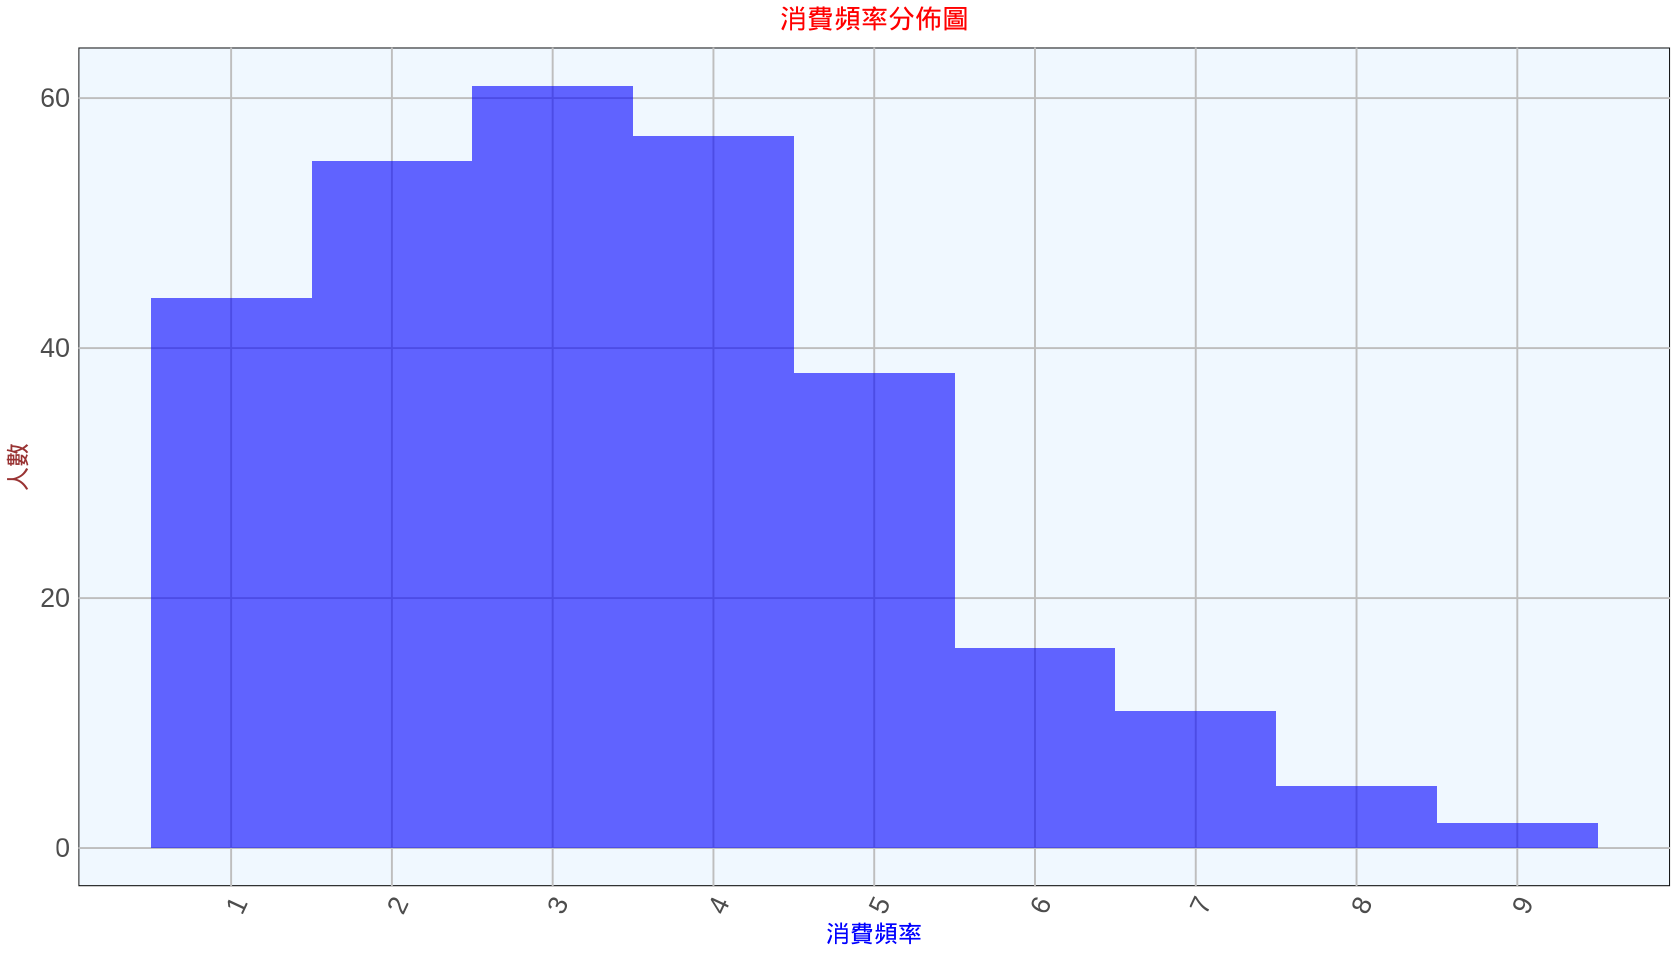

In [ ]:
#消費頻率與訂單數量分佈圖
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(orders02, aes(x=frequency)) + #依據orders02此資料集，x軸為頻率
  theme_bw() +
  scale_x_continuous(breaks=c(1:10)) +
  geom_histogram(alpha=0.6, binwidth=1, fill = "blue") + #直方圖
  ggtitle("消費頻率分佈圖")+
  xlab("消費頻率") +
  ylab("人數") + howard_theme()+
  theme(plot.title = element_text(color="red", size=20, hjust=0.5),
        axis.title.x = element_text(color="blue", size=18),
        axis.title.y = element_text(color="#993333", size=18))

# 10.最近一次（天）的消費 頻率分佈圖

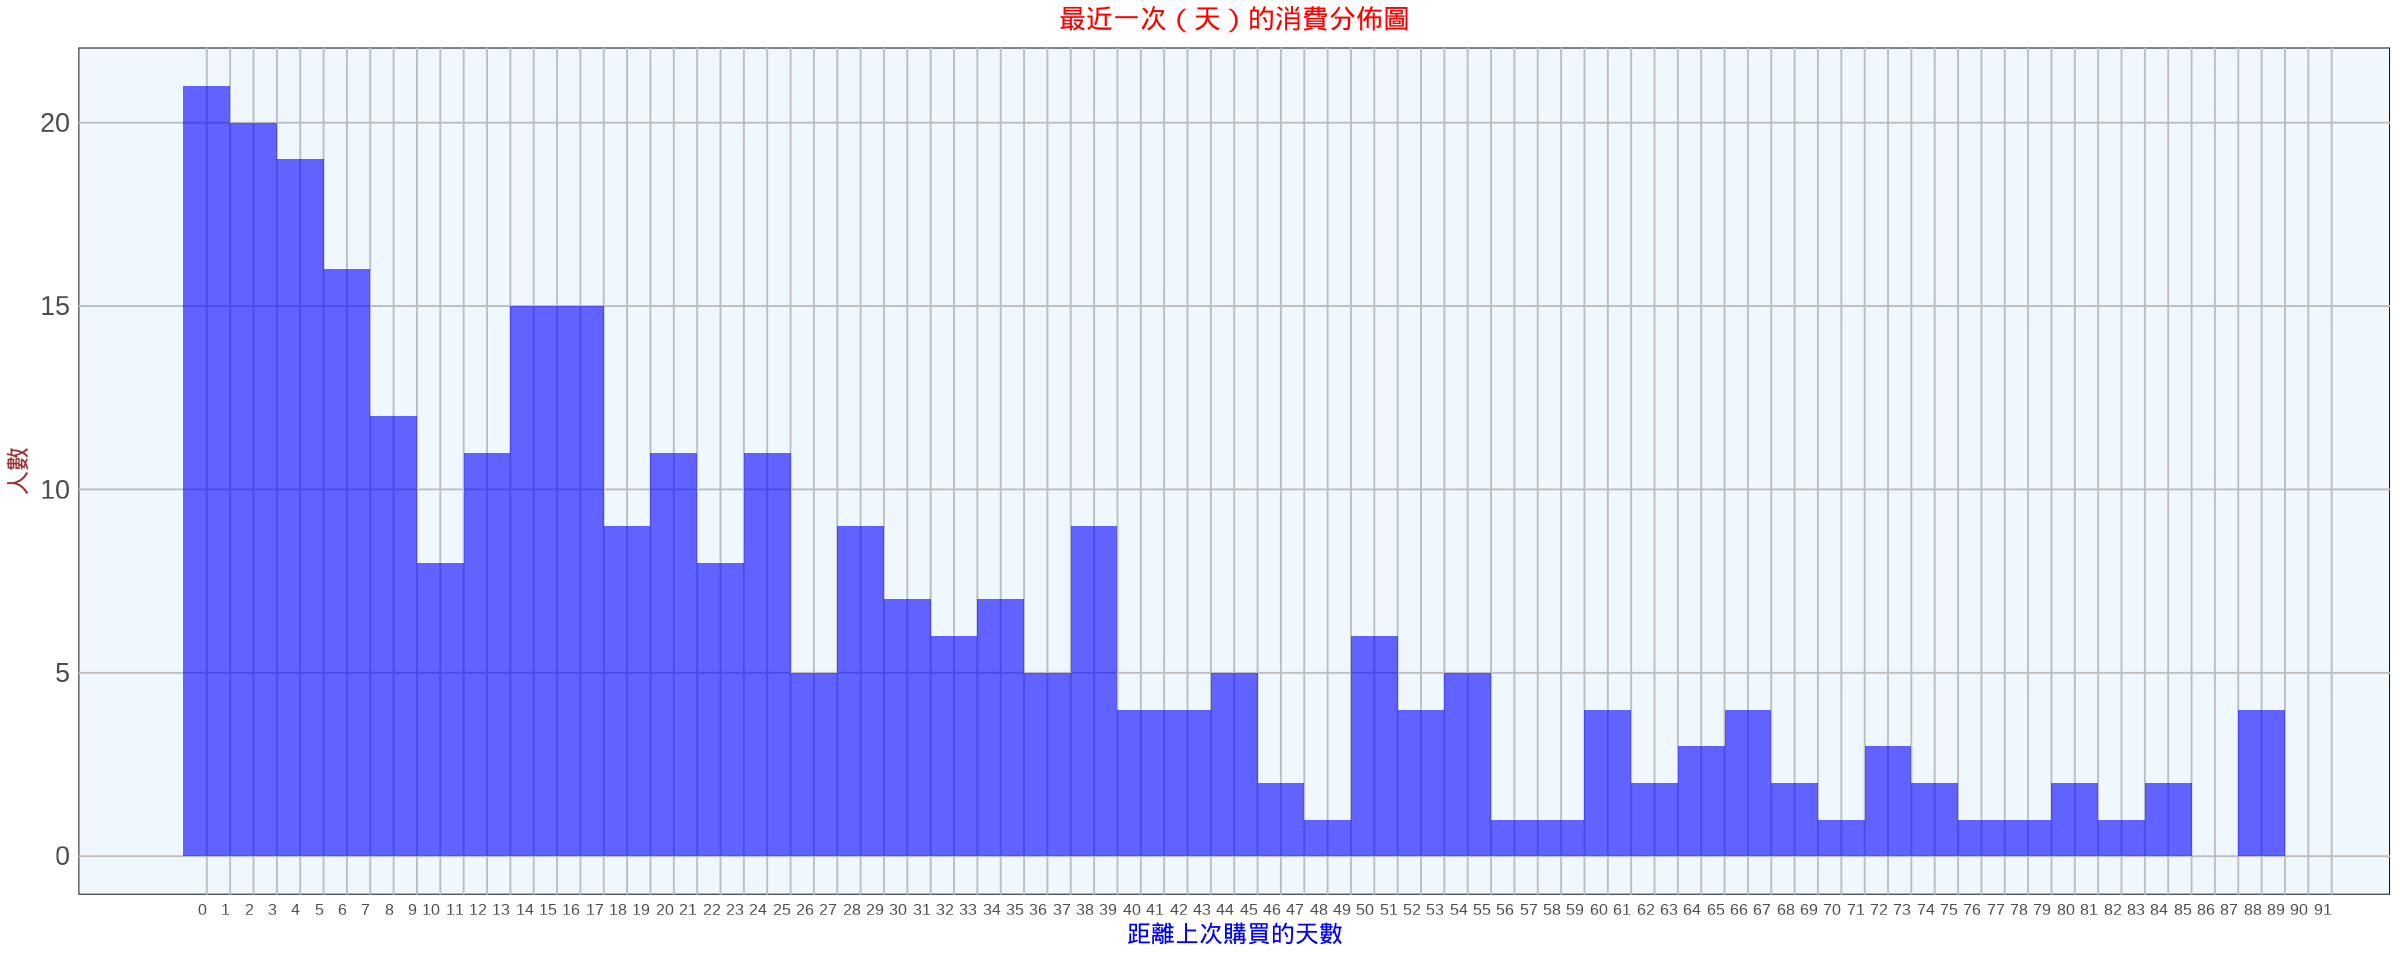

In [ ]:
# 最近一次（天）的消費 頻率分佈圖
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(orders02, aes(x=recency)) + #依據orders02此資料集，x軸為recency
  theme_bw() +
  geom_histogram(alpha=0.6, binwidth=2, fill = "blue") +
  scale_x_continuous(breaks=c(0:91))+
  ggtitle("最近一次（天）的消費分佈圖")+
  xlab("距離上次購買的天數") +
  ylab("人數") + howard_theme()+
  theme(plot.title = element_text(color="red", size=20, hjust=0.5),
        axis.title.x = element_text(color="blue", size=18),
        axis.text.x = element_text(size=12,angle=0),
        axis.title.y = element_text(color="#993333", size=18),
        panel.background = element_rect(fill = "aliceblue"),
        strip.background = element_rect(fill = "navy", color = "navy", size = 1),
        strip.text = element_text(face = "bold", size = 8, color = "white"))

從F與R圖上，很明顯可以發現：：

最近1天內消費與最近3天內消費的消費者，在購買量上，有極大的差距，但是最近76天內消費跟88天內消費的消費者在購買量上，並沒有差距。

這就是為何我們要畫出這兩張長條圖來決定交叉分析時「不同邊界」的原因。
所以我們就可以開始定義每個群體的邊界，而尋找邊界的方式可以利用上述F與R的分佈圖或結合業務方面的知識分析來定義不同的級距。

本次我們的邊界根據r與f的圖來判斷每一間隔的級距定義之：
1. 頻率分布邊界：1, 2, 3, 4, 5, >5
2. 近因分布邊界：0–7, 8–15, 16–22, 23–30, 31–55, >55


#11.交叉分析

# 12.切割頻率

In [ ]:
# 切割頻率(將連續型變數轉成類別型變數)
orders02.segm <- orders02 %>%

  mutate(buy_freq=ifelse(between(frequency, 1, 1), '1', #利用mutate去產生新變數buy_freq(購買頻率)，frequency, 1, 1，意思為1~1之間就當作消費1次成第1類
                         ifelse(between(frequency, 2, 2), '2',
                                ifelse(between(frequency, 3, 3), '3',
                                       ifelse(between(frequency, 4, 4), '4',
                                              ifelse(between(frequency, 5, 5), '5', '>5')))))) %>% #消費5次或5次以上的就當成第5類

  mutate(segm.rec=ifelse(between(recency, 0, 7), '0-7 天',
                         ifelse(between(recency, 8, 15), '8-15 天',
                                ifelse(between(recency, 16, 22), '16-22 天',
                                       ifelse(between(recency, 23, 30), '23-30 天',
                                              ifelse(between(recency, 31, 55), '31-55 天', '>55 天')))))) %>%

  mutate(cart=paste(ifelse(瓶裝水!=0, '、瓶裝水', ''), #區分有買還是沒買，有買為1，沒買為0
                    ifelse(牛奶麵包!=0, '、牛奶麵包', ''),
                    ifelse(高麗菜!=0, '、高麗菜', ''), sep='')) %>%

  arrange(clientId)

In [ ]:
head(orders02.segm)

orderId,clientId,gender,orderdate,牛奶麵包,瓶裝水,高麗菜,frequency,recency,buy_freq,segm.rec,cart
<dbl>,<dbl>,<chr>,<date>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
56,1,男性,2017-04-03,2,2,0,5,8,5,8-15 天,、瓶裝水、牛奶麵包
385,2,男性,2017-03-31,1,4,0,1,11,1,8-15 天,、瓶裝水、牛奶麵包
343,3,女性,2017-04-10,0,0,1,6,1,>5,0-7 天,、高麗菜
131,4,女性,2017-02-01,1,2,1,1,69,1,>55 天,、瓶裝水、牛奶麵包、高麗菜
538,5,男性,2017-03-26,1,0,0,4,16,4,16-22 天,、牛奶麵包
101,6,女性,2017-03-12,0,2,0,4,30,4,23-30 天,、瓶裝水


# 13.定義邊界的順序

In [ ]:
# 定義邊界的順序
orders02.segm$buy_freq <- factor(orders02.segm$buy_freq, levels=c('>5', '5', '4', '3', '2', '1'))
orders02.segm$segm.rec <- factor(orders02.segm$segm.rec, levels=c('>55 天', '31-55 天', '23-30 天', '16-22 天', '8-15 天', '0-7 天'))
orders02.segm$cart = str_split_fixed(orders02.segm$cart, '、', 2)[,2]

In [ ]:
str(orders02.segm)

tibble [289 × 12] (S3: tbl_df/tbl/data.frame)
 $ orderId  : num [1:289] 56 385 343 131 538 101 900 536 631 27 ...
 $ clientId : num [1:289] 1 2 3 4 5 6 7 8 9 10 ...
 $ gender   : chr [1:289] "男性" "男性" "女性" "女性" ...
 $ orderdate: Date[1:289], format: "2017-04-03" "2017-03-31" ...
 $ 牛奶麵包 : int [1:289] 2 1 0 1 1 0 3 1 1 4 ...
 $ 瓶裝水   : int [1:289] 2 4 0 2 0 2 3 3 3 2 ...
 $ 高麗菜   : int [1:289] 0 0 1 1 0 0 1 0 1 0 ...
 $ frequency: int [1:289] 5 1 6 1 4 4 5 3 1 3 ...
 $ recency  : num [1:289] 8 11 1 69 16 30 35 4 47 3 ...
 $ buy_freq : Factor w/ 6 levels ">5","5","4","3",..: 2 6 1 6 3 3 2 4 6 4 ...
 $ segm.rec : Factor w/ 6 levels ">55 天","31-55 天",..: 5 5 6 1 4 3 2 6 2 6 ...
 $ cart     : chr [1:289] "瓶裝水、牛奶麵包" "瓶裝水、牛奶麵包" "高麗菜" "瓶裝水、牛奶麵包、高麗菜" ...


In [ ]:
lcg <- orders02.segm %>%
  group_by(segm.rec, buy_freq) %>% #將兩者進行分群
  summarise(quantity=n()) %>%
  mutate(client='顧客人數') %>%
  ungroup()

`summarise()` has grouped output by 'segm.rec'. You can override using the
`.groups` argument.


In [ ]:
head(lcg)

segm.rec,buy_freq,quantity,client
<fct>,<fct>,<int>,<chr>
>55 天,4,2,顧客人數
>55 天,3,4,顧客人數
>55 天,2,7,顧客人數
>55 天,1,21,顧客人數
31-55 天,>5,5,顧客人數
31-55 天,5,9,顧客人數


In [ ]:
lcg.matrix = as.data.frame.matrix(table(orders02.segm$buy_freq, orders02.segm$segm.rec))
lcg.matrix$buy_freq = row.names(lcg.matrix)
lcg.matrix #算天數和次數的

,>55 天,31-55 天,23-30 天,16-22 天,8-15 天,0-7 天,buy_freq
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
>5,0,5,1,5,9,14,>5
5,0,9,2,5,5,17,5
4,2,6,9,13,12,15,4
3,4,17,6,9,10,15,3
2,7,13,11,7,6,11,2
1,21,9,3,3,4,4,1


#14.繪製RFM分析圖

In [ ]:
lcg.adv <- lcg %>%
  mutate(rec.type = ifelse(segm.rec %in% c(">55 天", "31-55 天", "23-30 天"), "not recent", "recent"),
         freq.type = ifelse(buy_freq %in% c(">5", "5", "4"), "frequent", "infrequent"),
         customer.type = interaction(rec.type, freq.type)) #整理成繪圖所用的資料格式

In [ ]:
head(lcg.adv)

segm.rec,buy_freq,quantity,client,rec.type,freq.type,customer.type
<fct>,<fct>,<int>,<chr>,<chr>,<chr>,<fct>
>55 天,4,2,顧客人數,not recent,frequent,not recent.frequent
>55 天,3,4,顧客人數,not recent,infrequent,not recent.infrequent
>55 天,2,7,顧客人數,not recent,infrequent,not recent.infrequent
>55 天,1,21,顧客人數,not recent,infrequent,not recent.infrequent
31-55 天,>5,5,顧客人數,not recent,frequent,not recent.frequent
31-55 天,5,9,顧客人數,not recent,frequent,not recent.frequent


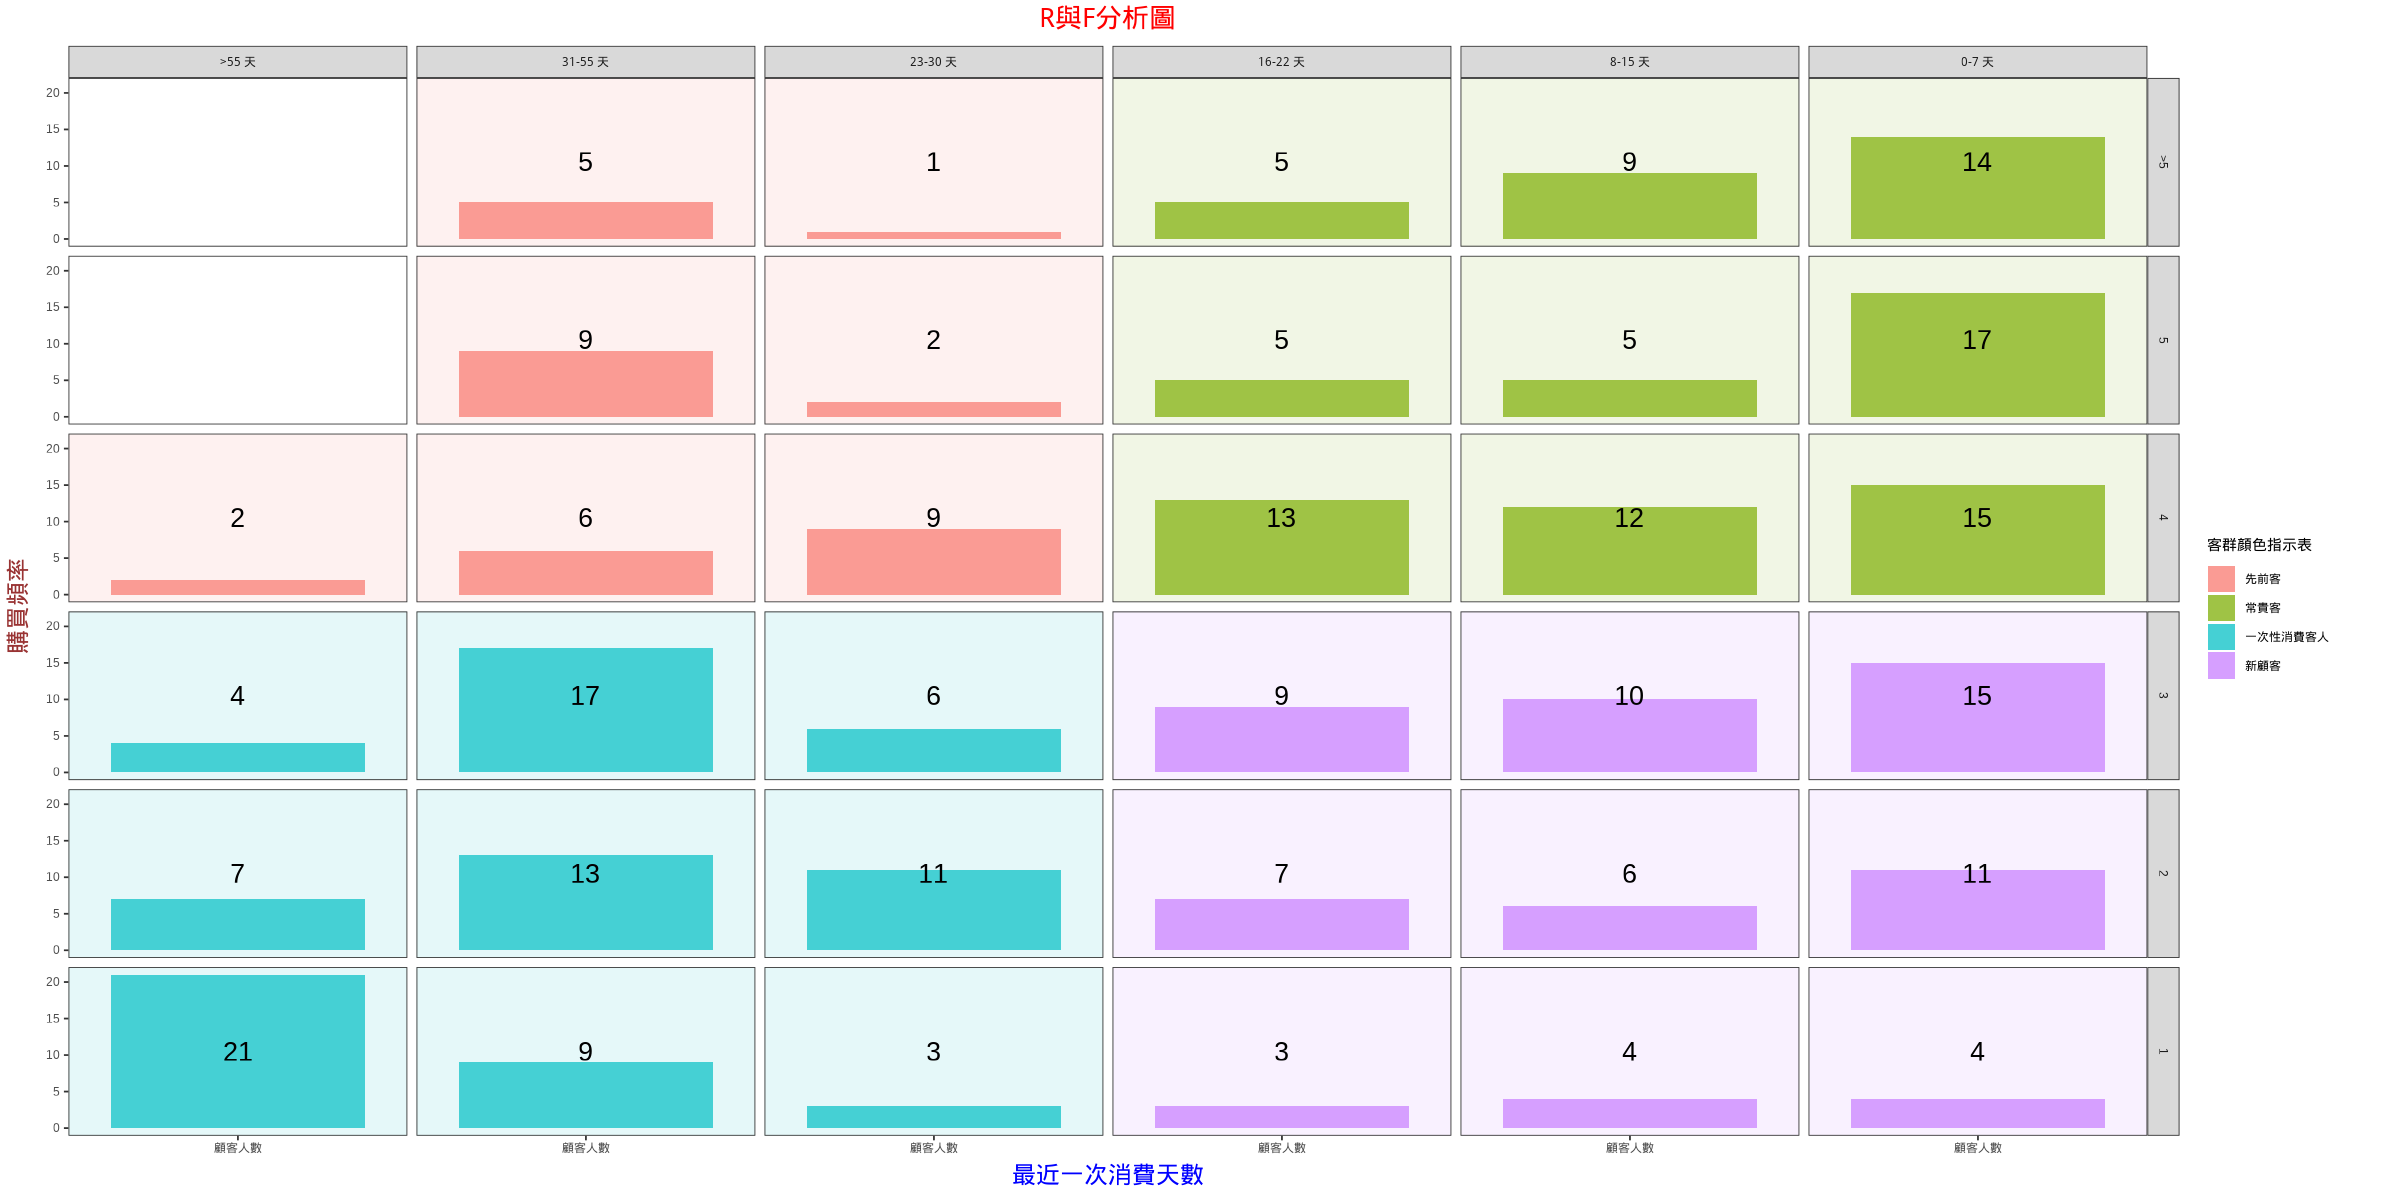

In [ ]:
#進行繪圖
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(lcg.adv, aes(x=client, y=quantity, fill=customer.type)) +
  theme_bw() +
  theme(panel.grid = element_blank()) +
  geom_rect(aes(fill = customer.type),
            xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf, alpha = 0.1) +
  facet_grid(buy_freq ~ segm.rec) +
  geom_bar(stat='identity', alpha=0.7) +
  geom_text(aes(y=max(quantity)/2, label=quantity), size=7) +
  ggtitle("R與F分析圖") +
  xlab("最近一次消費天數") + ylab("購買頻率")+
  theme(plot.title = element_text(color="red", size=20, hjust=0.5),
        axis.title.x = element_text(color="blue", size=18, face="bold"),
        axis.title.y = element_text(color="#993333", size=18, face="bold"))+
  guides(fill=guide_legend(title="客群顏色指示表"))+
  scale_fill_discrete(name="Experimental\nCondition",
                      breaks = c('not recent.frequent','recent.frequent','not recent.infrequent','recent.infrequent'),
                      labels = c('先前客','常貴客','一次性消費客人','新顧客'))

上圖片X軸為距離最近一次消費天數（R），而Y軸為購買頻率（F），
表格內方塊的數字則表示顧客人數。

人數越多方塊內的顏色堆疊越多，
並且顏色將顧客區隔分成四大類：

- 綠色區塊：常貴客
          在短時間內頻頻來光顧，他們是最重要的顧客，
          他們在短時間內已經來訪許多次了，也是忠實老顧客，是公司主要的客源。
- 紫色區塊：新顧客
          來訪的頻率不是特別高，也許是第一次來或者只是一次性消費的客人，
          但其中還是有潛力成為常貴客，所以行銷方向要以「產品導向」導入他們進入常貴客群為主。
- 紅色區塊：先前客
          他們對於一般的公司來說，是長時間內，營收最大的來源，
          公司必須要持續吸引他們，讓他們能於「更短時間內」再至來訪，重新產生購買，
          否則有可能會漸漸流失。
- 藍色區塊：一次性消費客人
          若此區塊比例偏多，代表來過的客人都不會來第二次。

#15.子區段分析（Sub-segments analysis）
接下來可針對不同的客群使用不同的行銷手段、價格、優惠，以達到最終目的！再進行子區段分析，依照不同人口變數或產品區分。

In [ ]:
lcg.sub <- orders02.segm %>%
  group_by(gender, cart, segm.rec, buy_freq) %>%
  summarise(quantity=n()) %>%
  mutate(client='顧客人數') %>%
  ungroup()

lcg.sub$gender = factor(lcg.sub$gender, levels = c('女性', '男性'))

`summarise()` has grouped output by 'gender', 'cart', 'segm.rec'. You can
override using the `.groups` argument.


In [ ]:
head(lcg.sub)

gender,cart,segm.rec,buy_freq,quantity,client
<fct>,<chr>,<fct>,<fct>,<int>,<chr>
女性,牛奶麵包,>55 天,3,1,顧客人數
女性,牛奶麵包,>55 天,2,1,顧客人數
女性,牛奶麵包,0-7 天,5,1,顧客人數
女性,牛奶麵包,0-7 天,3,1,顧客人數
女性,牛奶麵包、高麗菜,31-55 天,3,1,顧客人數
女性,牛奶麵包、高麗菜,31-55 天,2,1,顧客人數


# 16.繪製RFM分析圖(性別分類)  fill=gender

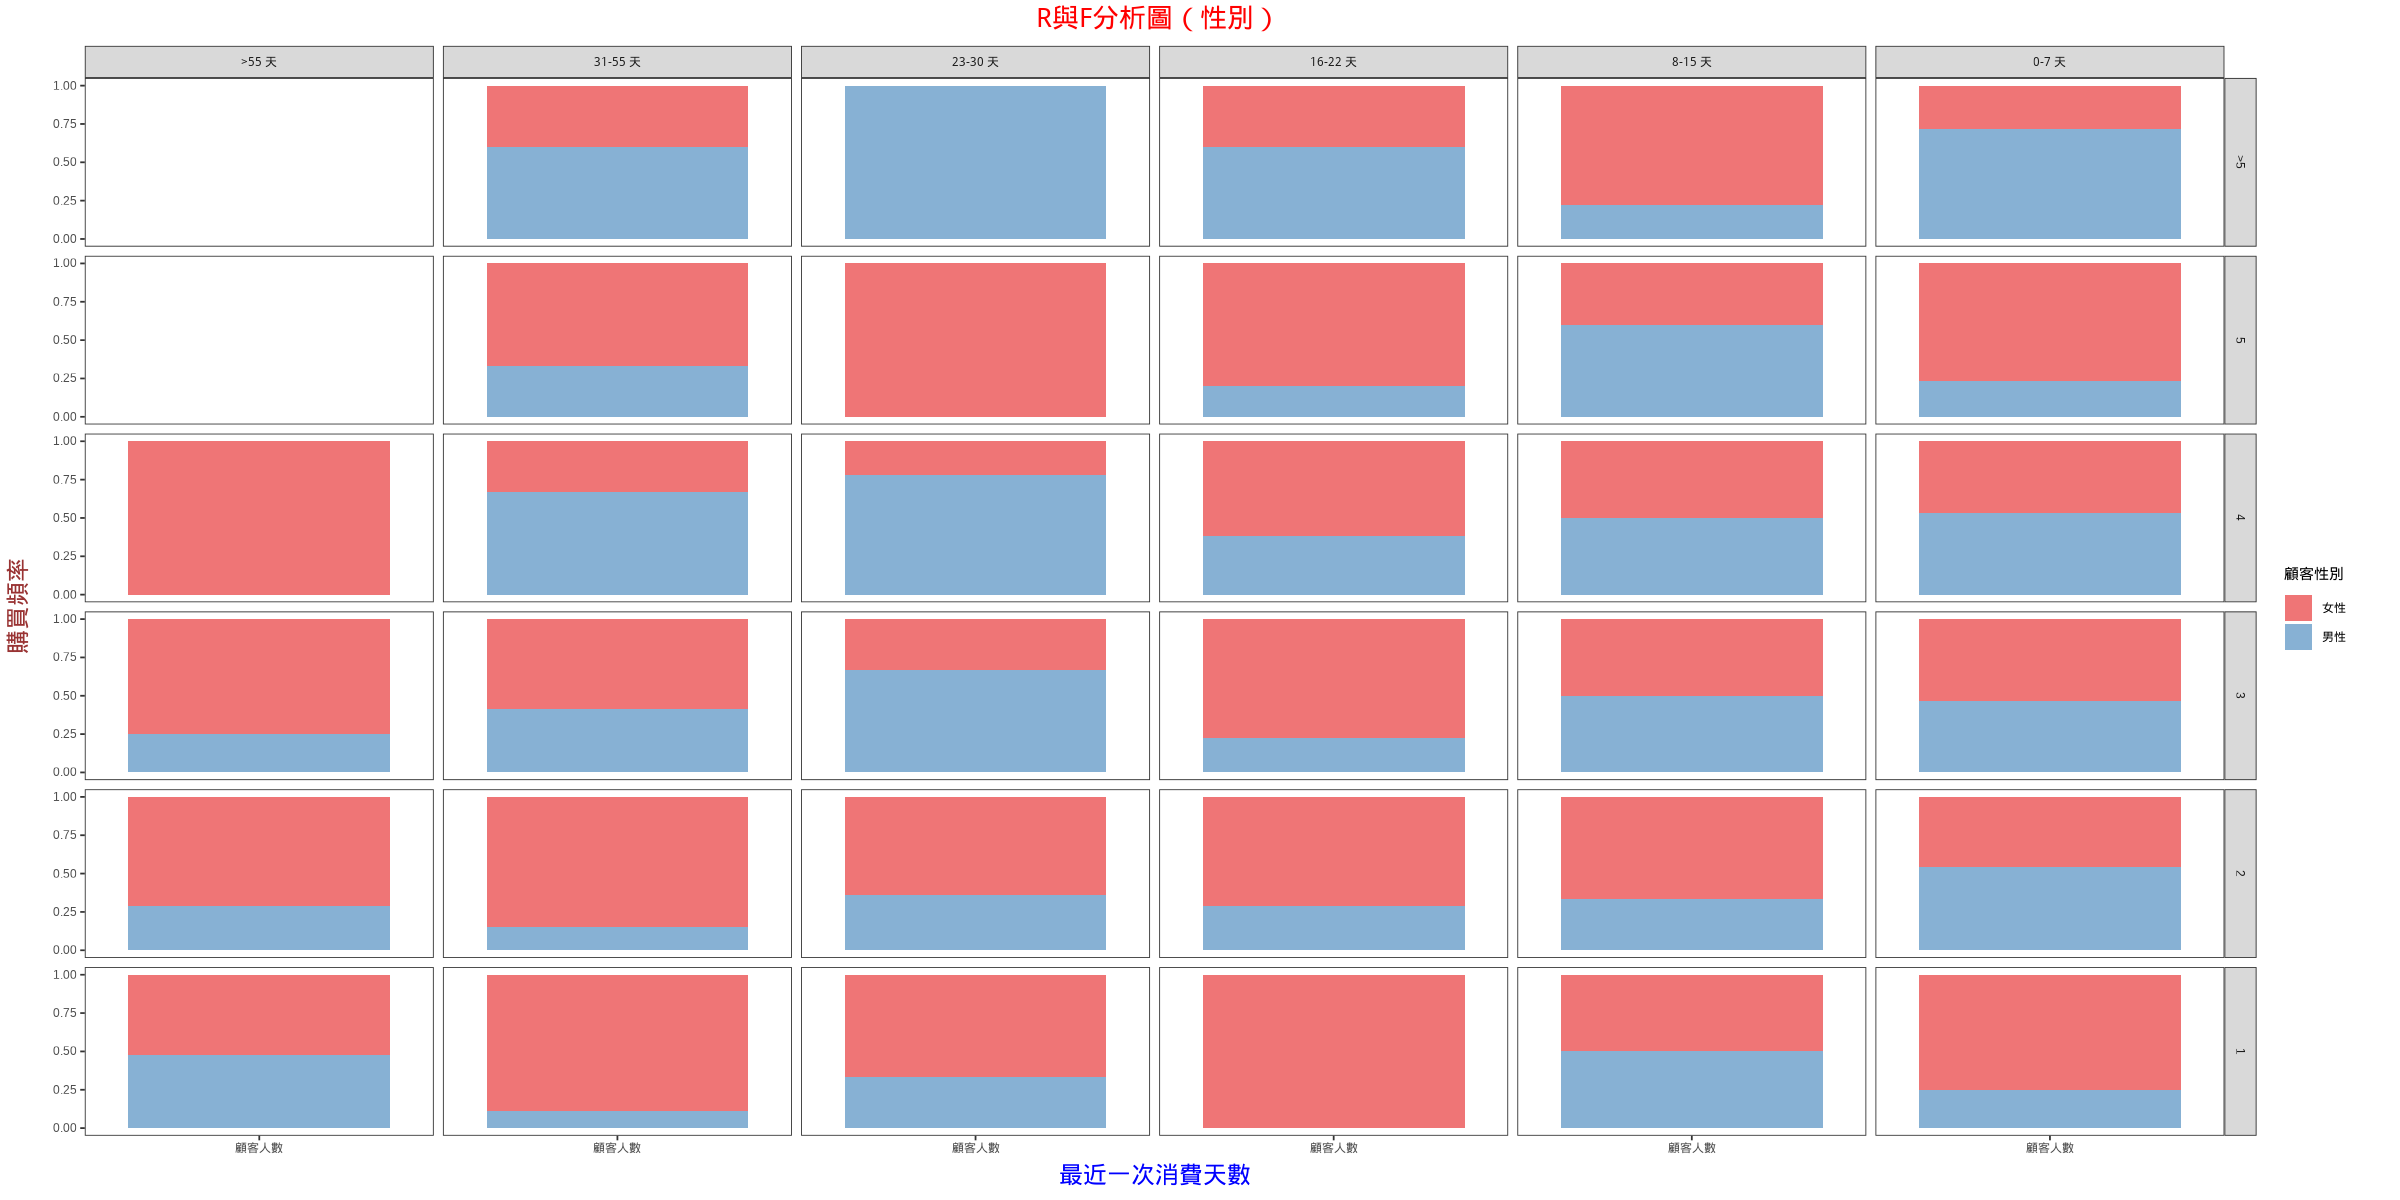

In [ ]:
# 繪製RFM分析圖(性別分類)  fill=gender
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(lcg.sub, aes(x=client, y=quantity, fill=gender)) +
  theme_bw() +
  scale_fill_brewer(palette='Set1') +
  theme(panel.grid = element_blank())+
  geom_bar(stat='identity', position='fill' , alpha=0.6) +
  facet_grid(buy_freq ~ segm.rec) +
  ggtitle("R與F分析圖（性別）") +
  xlab("最近一次消費天數") + ylab("購買頻率")+
  theme(plot.title = element_text(color="red", size=20, hjust=0.5),
        axis.title.x = element_text(color="blue", size=18, face="bold"),
        axis.title.y = element_text(color="#993333", size=18, face="bold"))+
  guides(fill=guide_legend(title="顧客性別"))

先將性別（gender）來做區隔，紅色區塊是女性，藍色區塊是男性，

如果僅看最重要的常貴客分群，由R與M分析圖（性別分類）可以觀察出：

    購買頻率在0–7天內平均大於5次為男性居多，但剛好等於5次的則是女性居多。

因此這時候再從性別切出更細更產品類別：

# 17.繪製RFM分析圖(商品分類)

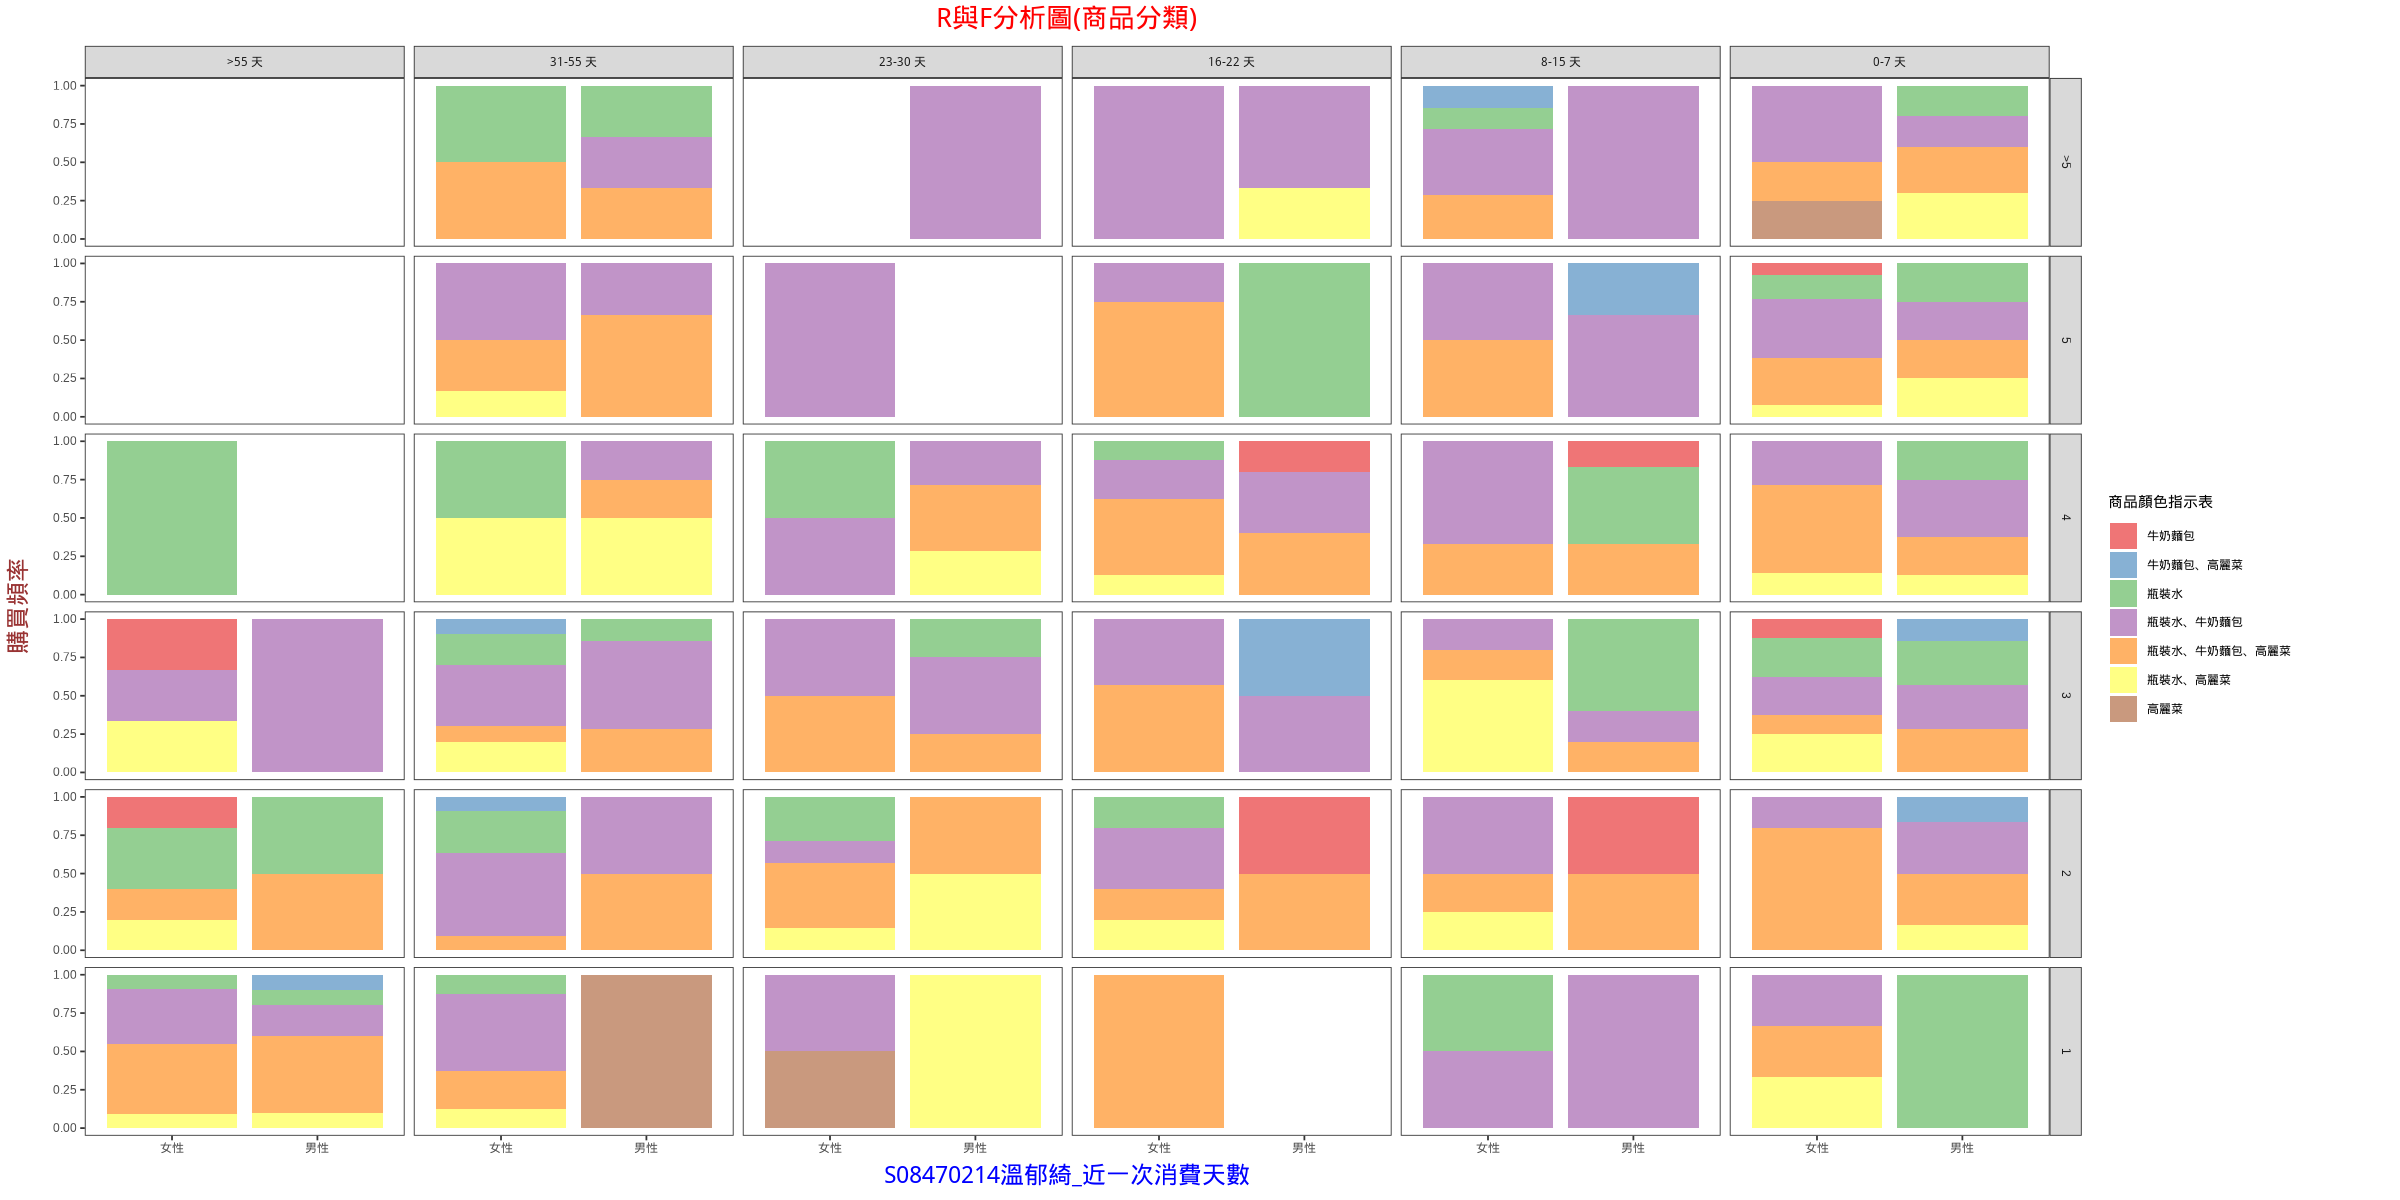

In [ ]:
# 繪製RFM分析圖(商品分類)  fill=cart
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(lcg.sub, aes(x=gender, y=quantity, fill=cart)) +
  theme_bw() +
  scale_fill_brewer(palette='Set1') +
  theme(panel.grid = element_blank())+
  geom_bar(stat='identity', position='fill' , alpha=0.6) +
  facet_grid(buy_freq ~ segm.rec) +
  ggtitle("R與F分析圖(商品分類)") +
  xlab("S08470214溫郁綺_近一次消費天數") + ylab("購買頻率")+
  theme(plot.title = element_text(color="red", size=20, hjust=0.5),
        axis.title.x = element_text(color="blue", size=18, face="bold"),
        axis.title.y = element_text(color="#993333", size=18, face="bold"))+
  guides(fill=guide_legend(title="商品顏色指示表"))

最後推薦哪一種商品變得更為清楚～！

首先，我們先從性別分類圖來看：
 - 0–7天內大於5次購買頻率的多為男生，女生次之

     - 男生喜好購買的優先順序為「瓶裝水、高麗菜」組合及「瓶裝水、高麗菜、牛奶麵包」組合。
     - 女生優先順序為「瓶裝水、牛奶麵包」組合及「瓶裝水、高麗菜、牛奶麵包」。

 - 0–7天內等於5次購買頻率的多為女生，男生次之

     - 男生喜好購買的優先順序為「瓶裝水、高麗菜」組合及「瓶裝水、高麗菜、牛奶麵包」組合。
     - 女生優先順序為「瓶裝水、牛奶麵包」組合、「瓶裝水、高麗菜、牛奶麵包」且單獨的「瓶裝水」。

 - 8–15天內大於5次購買頻率的多為女生，男生次之

     - 男生喜好購買的優先順序為「瓶裝水、牛奶麵包」的組合。

    推論：這群男生僅喜好一種組合，如果要讓這群男生逐漸轉變為0–7天消費，商家可以考慮在有利潤的情形下，對「瓶裝水、高麗菜」及「瓶裝水、高麗菜、牛奶麵包」的組合進行行銷活動，讓這群男生逐漸變成0–7天消費5次以上，賺取更多營收。
     - 女生則優先順序為「瓶裝水、牛奶麵包」的組合、「瓶裝水、高麗菜、牛奶麵包」。

再使用「8–15天內大於5次購買頻率的男性顧客」算看看：：

假設這群男生有200人，平均11.5天消費7.5次，而「瓶裝水、牛奶麵包」的組合利潤為100，
平均每天可以達到
    
    一天200人平均消費＝(7.5/11.5)*200人＝130.4348
    每天利潤＝100* 130.4348＝ 13043.48元

如果對「瓶裝水、高麗菜」及「瓶裝水、高麗菜、牛奶麵包」的組合進行行銷活動，舉例來說，「打折促銷」。

    瓶裝水、高麗菜＝250元原利潤經過7折轉換＝145
    瓶裝水、高麗菜、牛奶麵包＝210元原利潤79折轉換＝105

    200人因收到該折扣而到0-7天的轉換率 ＝ 200人 * 20% = 40人
這200人因為此行銷活動，為公司帶來的每天總利潤

    8–15天內大於5次購買頻率：
      (7.5次/11.5天)*160人*100＝ 10,435
    40人轉到「0–7天內大於5次購買平率」：
      (7.5次/5天)*15人*145+ (7.5次/5天)*25人*105=7,200

所以40人轉換，每天賺 10,435 + 7,200 ＝ 17,635，
比起原本的13,044，**每天還要多賺4,591**。

如果經濟、品牌等因素狀況不變一個月就多賺137,730，一年就差了168萬左右！



## 結論：由此可見R與F分析技術可以有效率地將數據結合，並可在子段進行無限的變化，就有很大的機會可以賺取更多的營收，只要有顧客相關的資料，例如：職業、住址、甚至興趣習慣等…，再配合上業務方面知識分析，便可製作出有指標性的視覺化資料，並且調整銷售策略。

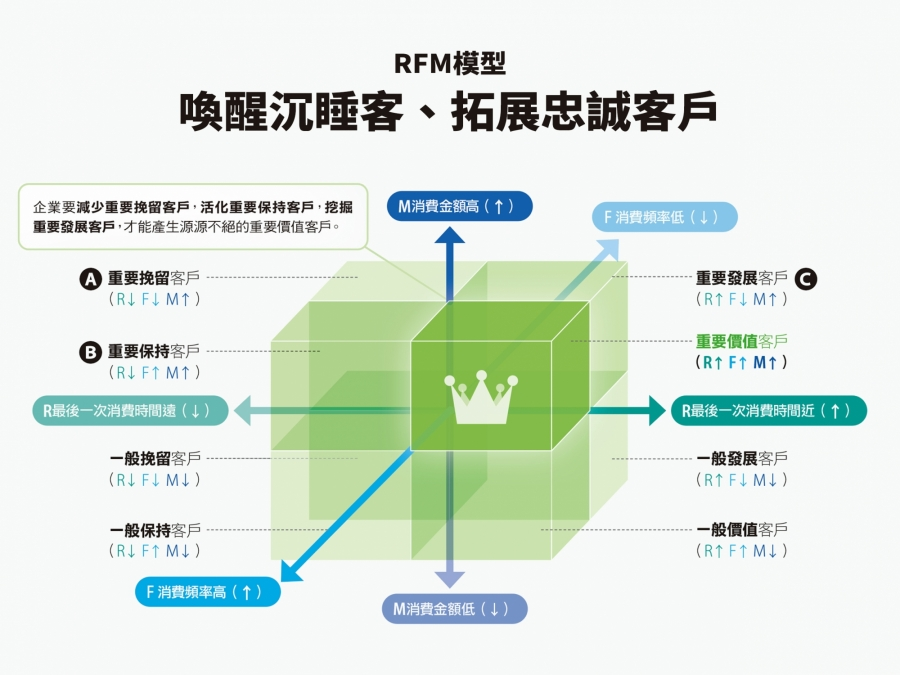